# 수업

In [1]:
import sklearn

In [2]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    print(f'정확도 : {accuracy} \n정밀도 : {precision} \n재현율 : {recall} \nF1 : {f1} \nAUC : {roc_auc}')


## 피마 인디언 당뇨병 예측

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [49]:
diabetes = pd.read_csv('./data/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [50]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [52]:
X = features = diabetes.drop(['Outcome'], axis = 1)
y = labels = diabetes['Outcome']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 156)

In [54]:
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [55]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 10]
 [26 31]]
정확도 : 0.7662337662337663 
정밀도 : 0.7560975609756098 
재현율 : 0.543859649122807 
F1 : 0.6326530612244897 
AUC : 0.8343280882618918


In [56]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y_test, pred_proba):
  # threshold의 ndarray와 threshold 값별 정밀도, 재현율에 대한 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
  
  # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
  plt.figure(figsize = (8, 6))
  thresholds_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[:thresholds_boundary], linestyle = "--", label = "precision")
  plt.plot(thresholds, recalls[:thresholds_boundary], linestyle = ":", label = 'recall')
  
  # thresholds의 값 X축 scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  
  plt.xlim()
  plt.xlabel('thresholds')
  plt.ylabel('precision & recall value')
  plt.legend()
  plt.grid()

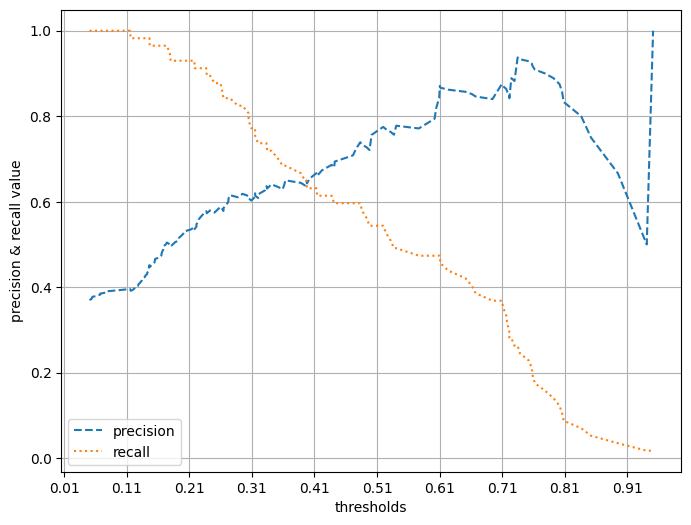

In [57]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [58]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


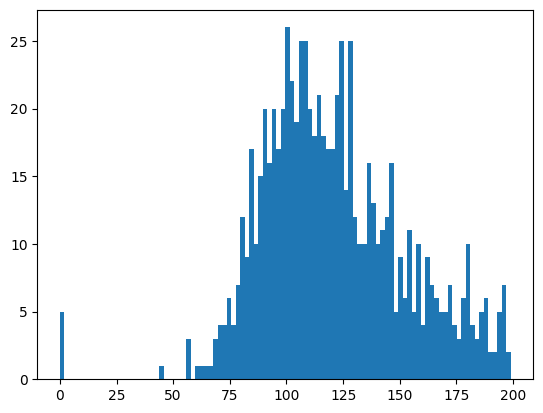

In [60]:
plt.hist(diabetes['Glucose'], bins = 100)
plt.show()

In [61]:
## 위 histogram에서 0값이 존재함을 알 수 있음
## 0을 각 칼럼의 평균으로 대체

zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[zero_features].mean()

diabetes[zero_features] = diabetes[zero_features].replace(0, diabetes[zero_features].mean())
diabetes[zero_features]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.000000,79.799479,33.6
1,85.0,66.0,29.000000,79.799479,26.6
2,183.0,64.0,20.536458,79.799479,23.3
3,89.0,66.0,23.000000,94.000000,28.1
4,137.0,40.0,35.000000,168.000000,43.1
...,...,...,...,...,...
763,101.0,76.0,48.000000,180.000000,32.9
764,122.0,70.0,27.000000,79.799479,36.8
765,121.0,72.0,23.000000,112.000000,26.2
766,126.0,60.0,20.536458,79.799479,30.1


In [62]:
## 정규화

X = features = diabetes.iloc[:, :-1]
y = labels = diabetes.iloc[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 156)

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [63]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[83 14]
 [25 32]]
정확도 : 0.7467532467532467 
정밀도 : 0.6956521739130435 
재현율 : 0.5614035087719298 
F1 : 0.6213592233009708 
AUC : 0.8317959848073793


## 분류

- 지도학습 : 레이블(명시적인 정답)이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
- 지도학습의 대표 유형으로 분류(Classification)이 있음

- 분류(Classification) : 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것
- 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤, 새롭게 관측된 데이터에 대한 레이블을 판별하는 것

### 앙상블 방법(Ensemble Method)

- 앙상블은 분류에서 가장 각광을 받는 방법 중 하나
- 정형 데이터의 예측 분석 영역에서는 앙상블이 매우 높은 예측 성능으로 인해 많이 애용됨
- 일반적으로 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉨

- 배깅 방식의 대표인 랜덤 포레스트는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘
- 최근 XgBoost와 LightGBM 활용도 높음
- 앙상블은 서로 다른/또는 같은 알고리즘을 결합함 (대부분 동일한 알고리즘 결합)
- 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정 트리임

#### 결정 트리 
- 매우 쉽고 유연하게 적용될 수 있는 알고리즘
- 데이터 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음
- 하지만, 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합이 발생해 오히려 예측 성능이 저하될 수 있음

- 결정 트리의 단점은 앙상블 기법에서는 오히려 장점으로 작용됨
- 앙상블은 매우 많은 여러 개의 약한 학습기(예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시킴
- 결정 트리가 좋은 약한 학습기가 됨

## 결정 트리

- ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것

- 규칙 노드(Decision Node) : 규칙 조건
- 리프 노드(Leaf Node) : 결정된 클래스 값
- 새로운 규칙 조건마다 서브 트리(Sub Tree)가 생성됨
- 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어짐

- 많은 규칙이 있다는 것은 분류를 결정하는 방식이 더욱 복잡해진다는 얘기이며, 이는 곧 과적합으로 이어지기 쉬움
- 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음

- 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
- 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요함

- 데이터 세트의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미침
- 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦

- 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보이득(Information Grain) 지수와 지니 계수가 있음

### 정보 이득

- 엔트로피 : 주어진 데이터 집합의 혼잡도 (서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음)
- 정보 이득 지수 = 1 - 엔트로피 지수
- 결정 트리는 이 정보 이득 지수로 분할 기준을 정함 (정보 이득이 높은 속성을 기준으로 분할함)

### 지니 계수

- 0이 가장 평등하고 1로 갈수록 불평등해짐
- 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석됨

- 결정 트리의 일반적인 알고리즘은 데이터 세트를 분할하는 데 가장 좋은 조건, 즉
- 정보 이득이 높거나
- 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤,
- 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정함

### 결정 트리 모델의 특징

- 균일도를 기반으로 해서 알고리즘이 쉽고 직관적임
- 결정 트리가 룰이 매우 명확하고, 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어지는 지 알 수 있고, 시각화도 가능함
- 특별한 경우 제외하고 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음

- 반면에 과적합으로 정확도가 떨어질 수 있음
- 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 깊어지고 복잡해질 수 밖에 없음
- 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 도움이 됨

### 결정 트리 모델의 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size= .2, random_state = 11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [3]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names,
               feature_names = iris_data.feature_names, impurity= True, filled= True)

In [4]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


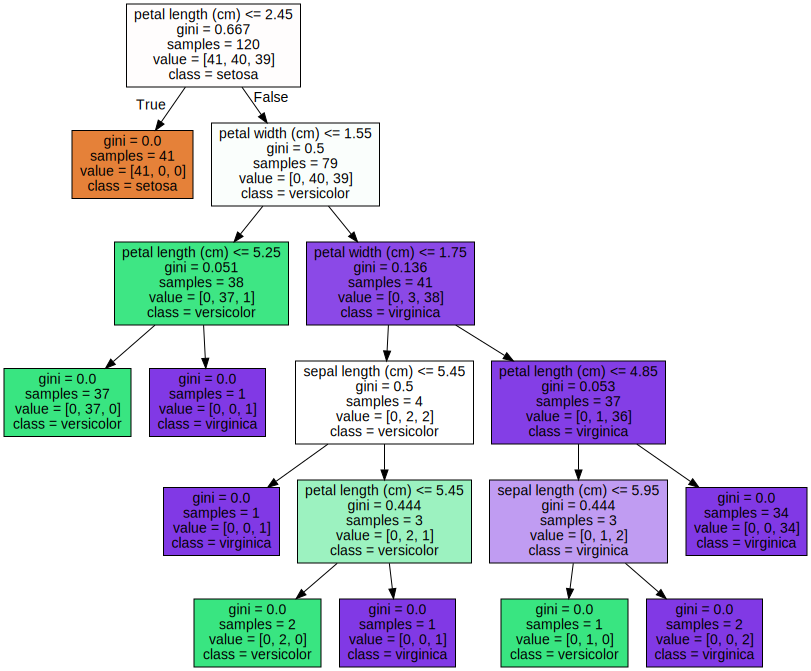

In [6]:
### graphviz는 홈페이지 들어가서 별도로 설치 후에 pip install 해야 함


import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

#### 리프 노드
- 더 이상 자식 노드가 없는 노드 
- 최종 클래스(레이블) 값이 결정되는 노드
- 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 
- 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 됨

#### 브랜치 노드
- 자식 노드가 있는 노드
- 자식 노드를 만들기 위한 분할 규칙 조건을 갖고 있음

#### 지표들의 의미
- petal length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건임(이 조건 없으면 리프 노드)
- gini : 다음의 value = []로 주어진 데이터 분포에서의 지니 계수
- samples : 현 규칙에 해당하는 데이터 건수
- value = [] : 클래스 값 기반의 데이터 건수

- petal length(cm) <= 2.45 : 해당 규칙으로 자식 노드 생성
- samples = 120 : 전체 데이터 120개
- value = [41, 40, 39] : Setosa 41개, Versicolor 40개, Virginica 39개로 데이터 구성
- gini = 0.667 : sample 120 / values = [41, 40, 39] 분포도로 되어 있으므로 지니 계수 0.667
- class = setosa : 하위 노드를 가질 경우에 setosa의 개수가 41개로 제일 많음

- 각 노드의 색깔을 붗꽃 데이터의 레이블 값을 의미
- 주황색 0 : Setosa, 초록색 1 : Versicolor, 보라색 2 : Virginica
- 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많음

- 결정 트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만듦
- 이로 인해 매우 복잡핮 규칙 트리 만들어져 모델이 쉽게 과적합되는 문제점을 가짐
- 따라서 결정 트리는 과적합이 상당히 높은 ML 알고리즘임

#### max_depth 하이퍼 파라미터
- 결정 트리의 최대 트리 깊이를 제어함

#### min_samples_split 하이퍼 파라미터
- 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
- min_sample_split = 4 지정 시 samples가 3개이면 서로 class 값이 있어도 split 하지 않음

#### min_samples_leaf 하이퍼 파라미터
- 분할될 경우 왼쪽과 오른쪽 자식 노드 각각이 가지게 될 최소 데이터 건수 지정
- 어떤 노드가 분할할 경우, 왼쪽과 오른쪽 자식 노드 중에 하나라도 min_samples_leaf로 지정된 최소 데이터 건수보다 더 작은 샘플 데이터 건수를 갖게 되면, 해당 노드는 더 이상 분할하지 않음

- min_samples_leaf의 값을 키우면 분할될 수 있는 조건이 어렵게 되므로, 리프 노드가 될 수 있는 조건이 상대적으로 완화됨
- 보통 분할 시, 왼쪽 or 오른쪽 중 어느 한 쪽 샘플 데이터 건수는 크고 다른 쪽 건수는 작아지기 쉬움
- min_samples_leaf를 큰 값으로 지정하면 분할될 때 자식 노드들 모두가 해당 조건을 만족하기에 어려워짐

- 결정트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건임
- 중요한 몇 개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하며, 
- 모델을 좀 더 간결하고 이상치에 강한 모델을 만들 수 있기 때문임
- feature_importances_ 속성은 피러별로 중요도 값을 알려줌

Feature importances : [0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.02500520941862888
sepal width (cm) : 0.0
petal length (cm) : 0.5549028149313102
petal width (cm) : 0.42009197565006084


<AxesSubplot:>

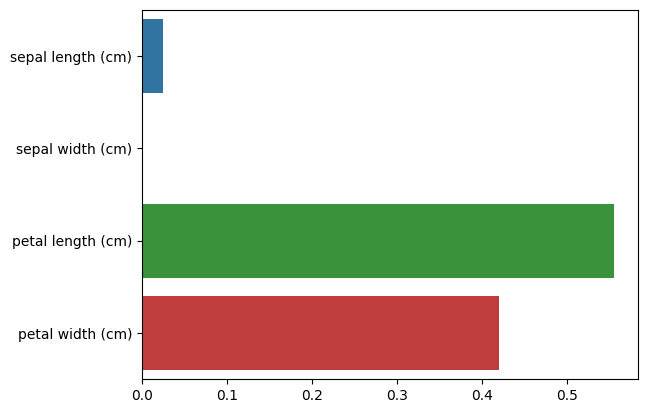

In [7]:
import seaborn as sns
import numpy as np

# feature importance 추출
print(f'Feature importances : {np.round(dt_clf.feature_importances_, 3)}')

# features 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value}')
    
# feature importance를 column 별로 시각화 하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

### 결정 트리 과적합

- 일부 이상치 데이터까지 분할하면 결정 기준 경계가 매우 많아짐
- 결정 트리의 기본 하이퍼 파라미터 설정은 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준으로 인해 결정 기준 경계가 많아지고 복잡해짐
- 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어짐

- 이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙의 성능이 더 좋음
- 테스트 데이터 세트는 학습 데이터 세트와는 다른 데이터 세트인데, 학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있기 때문임

### 사용자 행동 인식 데이터 세트

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./data/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10]) 

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [31]:
## 중복된 피처명 얼마나 있는지

feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head(10) 

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


In [32]:
## 원본 피터명에 _1 또는 _2 추가로 부여해 새로운 피처명을 가지고는 DataFrame 반환

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0],  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df 

In [14]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./data/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./data/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./data/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./data/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset() 

In [15]:
y_test

,action
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(f'결정 트리 예측 정확도 : {accuracy}')

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print(f'DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8547675602307431
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [33]:
## GridSearchCV를 이용해 사이킷런 결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터인 max_depth 값을 변화시키면서 예측 성능 확인

from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6, 8, 10, 12, 16, 20, 24],
         'min_samples_split' : [16]} 

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy',
                       cv = 5, verbose = 3, n_jobs = -1)
# n_jobs : Number of jobs to run in parallel (병렬적으로 여러 개가 동시에 처리되어 시간 단축됨)
# n_jobs = -1은 모든 processor를 사용한다는 뜻임

grid_cv.fit(X_train, y_train)

print(f'GridSearchCV 최고 평균 정확도 수치 : {grid_cv.best_score_}')
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8548794147162603
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [36]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


- mean_test_score : 5개 CV 세트에서 검증용 데이터 세트의 정확도 평균 수치
- mean_test_score는 max_depth가 8일 때 0.854로 정확도가 정점이고, 이를 넘어가면서 정확도가 계속 떨어짐
- 결정 트리는 더 완벽한 규칙을 학습 데이터 세트에 적용하기 위해 노드를 지속적으로 분할하면서 깊이가 깊어지고 더욱 더 복잡한 모델이 됨
- 깊어진 트리는 학습 데이터 세트에는 올바른 예측 겨로가를 가져올지 모르지만, 검증 데이터 세트에서는 오히려 과적합으로 인한 성능 저하를 유발하게 됨

In [37]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

# max_depths 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'max_depth = {depth} \n정확도 : {accuracy}')

max_depth = 6 
정확도 : 0.8551068883610451
max_depth = 8 
정확도 : 0.8717339667458432
max_depth = 10 
정확도 : 0.8598574821852731
max_depth = 12 
정확도 : 0.8571428571428571
max_depth = 16 
정확도 : 0.8598574821852731
max_depth = 20 
정확도 : 0.8564642008822532
max_depth = 24 
정확도 : 0.8564642008822532


- max_depth가 8일 경우 약 87.17%로 가장 높은 정확도를 나타냄
- max_depth가 8을 넘어가면서 정확도가 계속 감소함
- 깊이가 깊어질수록 테스트 데이터 세트의 정확도는 더 떨어짐
- 결정 트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터를 이용해 깊이를 제어할 수 있어야 함
- 복잡한 모델보다도 트리 깊이를 낮춘 단순한 모델이 더욱 효과적인 결과를 가져올 수 있음

In [23]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_split=16, random_state=156)

In [38]:
best_df_clf = grid_cv.best_estimator_
pred1 = grid_cv.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
accuracy

0.8717339667458432

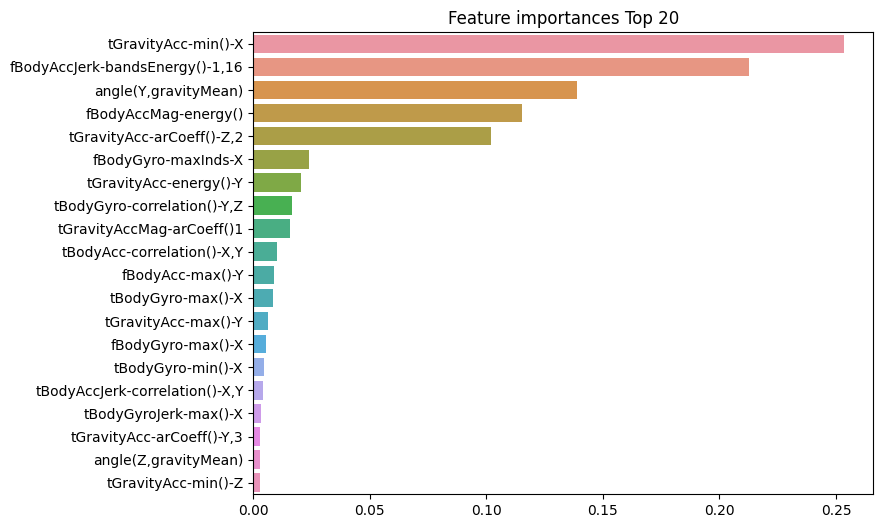

In [39]:
# 결정 트리에서 각 피처의 중요도를 feature_importance_ 속성을 이용해 알아보고 중요도가 높은 순으로 top 20 피처를 막대 그래프로 표현

import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, Series 변환(seaborn 표현 위해)
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()